<a href="https://colab.research.google.com/github/Caculuz-cinks/black_faces_age_estimation/blob/main/Black_face_Age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/FAE_D1_collated_cleaned'

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 57.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 64.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 26.6 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=8c3cd8a5329b

In [ ]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [ ]:
import re
# pattern = r'([^/]+).JPG$'
#pattern = r'[^/]+(\d{2}).JPG$'
pattern = r'(\d+)_\d+_\d+_\d+\.jpg$'
# pattern = r'([A-Za-z0-9]+)\.JPG$'

p = re.compile(pattern)

r = p.search('/content/drive/My Drive/FAE_D1_collated_cleaned/20_0_1_422.jpg')

print(r.group(1))

20


In [ ]:
DATADIR = '/content/drive/My Drive/FAE_D1_collated_cleaned'

In [ ]:
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern = pattern, is_regression= True,
                      random_state = 42)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/FAE_D1_collated_cleaned/37_1_2_7547.png -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/FAE_D1_collated_cleaned/7_0_2_1443.png -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/FAE_D1_collated_cleaned/19_0_4_3845.png -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract target for /content/drive/My Drive/FAE_D1_collated_cleaned/51_1_1_10317.png -  skipping this file
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ktrain/vision/data.py:814: UserWarning: Could not extract tar

['label']
       label
5339    64.0
12406   16.0
10839   46.0
1372    84.0
8686    58.0
['label']
       label
5385    74.0
1453     2.0
12824   32.0
6740    74.0
3495    90.0
Found 13205 validated image filenames.
Found 1468 validated image filenames.


In [ ]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
model = vis.image_regression_model('pretrained_resnet50', train_data = train_data, val_data = test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94765736/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner = ktrain.get_learner(model = model, train_data = train_data, val_data = test_data, batch_size = 64)

In [ ]:
learner.fit_onecycle(1e-4, 9)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/9
207/207 [==============================] - 266s 1s/step - loss: 1306.7545 - mae: 29.2558 - val_loss: 549.5607 - val_mae: 19.9885
Epoch 2/9
207/207 [==============================] - 259s 1s/step - loss: 390.1689 - mae: 16.4777 - val_loss: 263.7822 - val_mae: 13.1502
Epoch 3/9
207/207 [==============================] - 261s 1s/step - loss: 212.1281 - mae: 11.6483 - val_loss: 174.9203 - val_mae: 10.3050
Epoch 4/9
207/207 [==============================] - 263s 1s/step - loss: 147.1807 - mae: 9.5421 - val_loss: 129.6753 - val_mae: 8.8210
Epoch 5/9
207/207 [==============================] - 262s 1s/step - loss: 112.5851 - mae: 8.3054 - val_loss: 102.5432 - val_mae: 7.7976
Epoch 6/9
207/207 [==============================] - 262s 1s/step - loss: 93.2190 - mae: 7.5162 - val_loss: 89.1252 - val_mae: 7.2624
Epoch 7/9
207/207 [==============================] - 262s 1s/step - loss: 82.9742 - mae: 7.0804 - val_loss: 82.1324

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
test_data.filenames[10:20]

['39_1_1_7957.jpg',
 '33_0_2_6619.jpg',
 '58_1_6_11745.jpg',
 '79_0_6_15810.jpg',
 '36_1_4_7395.jpg',
 '12_0_2_2481.jpg',
 '95_1_4_19161.jpg',
 '56_1_1_11362.jpg',
 '35_1_4_7126.jpg',
 '24_0_3_4824.jpg']

In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Get the filename of the uploaded image
filenames = list(uploaded.keys())
print(f"Uploaded file: {filenames}")

Saving 80_0_1_20180113184110992.jpg to 80_0_1_20180113184110992.jpg
Saving 2_0_1_20180113184110994.jpg to 2_0_1_20180113184110994.jpg
Saving 12_0_1_20180113184110995.jpg to 12_0_1_20180113184110995.jpg
Saving 22_0_1_20180113184110991.jpg to 22_0_1_20180113184110991.jpg
Saving 28_1_1_20180113184110995.jpg to 28_1_1_20180113184110995.jpg
Saving 53_1_1_20180113184110993.jpg to 53_1_1_20180113184110993.jpg
Uploaded file: ['80_0_1_20180113184110992.jpg', '2_0_1_20180113184110994.jpg', '12_0_1_20180113184110995.jpg', '22_0_1_20180113184110991.jpg', '28_1_1_20180113184110995.jpg', '53_1_1_20180113184110993.jpg']


In [ ]:
def real_prediction(image_path):
    # Predict the age using the predictor with the full image path
    pred = round(predictor.predict_filename(image_path)[0])

    # If you want to compare it with the actual age (assuming the age is in the filename):
    actual = int(p.search(image_path).group(1)) if p.search(image_path) else "N/A"

    # Display the image
    vis.show_image(image_path)

    # Print the predicted age and the actual age if available
    print("Predicted Age: %s | Actual Age: %s" % (pred, actual))

Predicted Age: -3 | Actual Age: 2


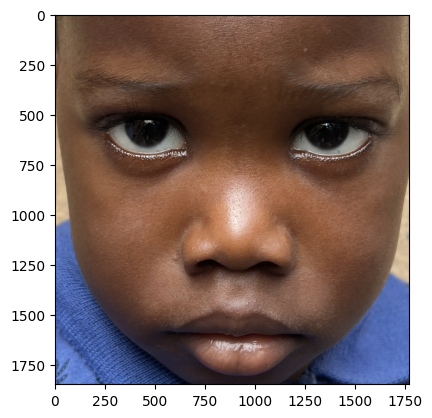

In [ ]:
real_prediction('2_0_1_20180113184110994.jpg')

Predicted Age: 17 | Actual Age: 12


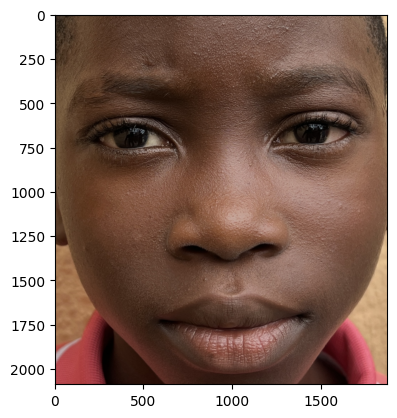

In [ ]:
real_prediction('12_0_1_20180113184110995.jpg')

Predicted Age: 35 | Actual Age: 22


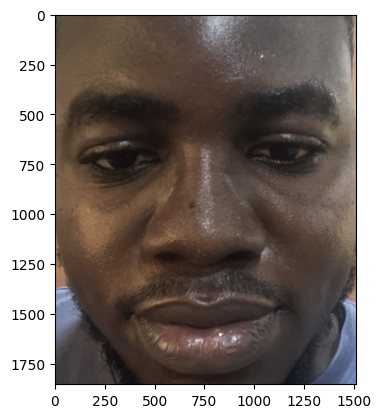

In [ ]:
real_prediction('22_0_1_20180113184110991.jpg')

Predicted Age: 46 | Actual Age: 28


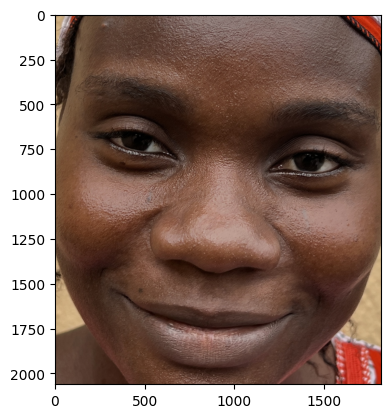

In [ ]:
real_prediction('28_1_1_20180113184110995.jpg')

Predicted Age: 59 | Actual Age: 53


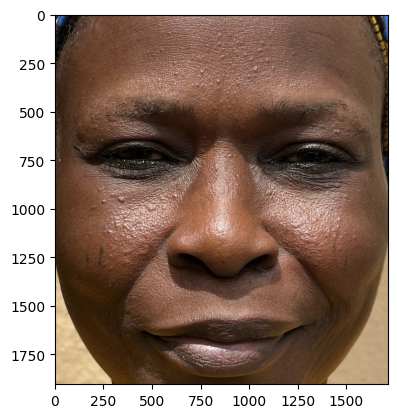

In [ ]:
real_prediction('53_1_1_20180113184110993.jpg')

Predicted Age: 62 | Actual Age: 80


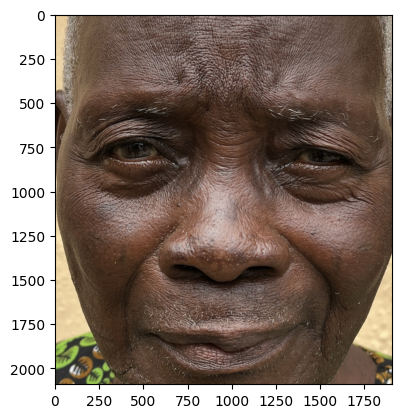

In [ ]:
real_prediction('80_0_1_20180113184110992.jpg')

In [ ]:
print(f"Predicted Age: 61 | Actual Age: 80")


Predicted Age: 61 | Actual Age: 80
